In [1]:
import matplotlib.pyplot as plt

from src import data_catalog
from src import tseries_mod
from src.utils_plot import plot_1var

%matplotlib inline

In [2]:
data_catalog.set_catalog('experiments')

active catalog: experiments


In [3]:
varnames = ['TS', 'SFCO2_LND', 'SFCO2_OCN']

In [4]:
experiment = '1pctCO2-cmip5'
ds_1pctCO2_cmip5_ann = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, stream='cam2.h0', freq='ann')
# print(ds_1pctCO2_cmip5_ann)

In [5]:
experiment = '1pctCO2-bgc-cmip5'
ds_1pctCO2_bgc_cmip5_ann = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, stream='cam2.h0', freq='ann')
# print(ds_1pctCO2_bgc_cmip5_ann)

In [6]:
experiment = '1pctCO2-rad-cmip5'
ds_1pctCO2_rad_cmip5_ann = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, stream='cam2.h0', freq='ann')
# print(ds_1pctCO2_rad_cmip5_ann)

In [7]:
experiment = '1pctCO2'
ds_1pctCO2_ann = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, freq='ann')
# print(ds_1pctCO2_ann)

In [8]:
experiment = '1pctCO2-bgc'
ds_1pctCO2_bgc_ann = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, freq='ann')
# print(ds_1pctCO2_bgc_ann)

In [9]:
experiment = '1pctCO2-rad'
ds_1pctCO2_rad_ann = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, freq='ann')
# print(ds_1pctCO2_rad_cmip5_ann)

In [10]:
# add cummulate flux vars and TS anomaly to datasets
for ds in [ds_1pctCO2_cmip5_ann, ds_1pctCO2_bgc_cmip5_ann, ds_1pctCO2_rad_cmip5_ann,
           ds_1pctCO2_ann, ds_1pctCO2_bgc_ann, ds_1pctCO2_rad_ann]:
    for varname in ['SFCO2_LND', 'SFCO2_OCN']:
        da = (-1.0) * ds[varname].cumsum(dim='time', keep_attrs=True)
        da.attrs['units'] = 'Pg'
        ds[varname+'_CUM'] = da
    for varname in ['TS']:
        da = ds[varname].copy()
        da -= da.isel(time=slice(0,10)).mean(dim='time')
        ds[varname+'_anom'] = da

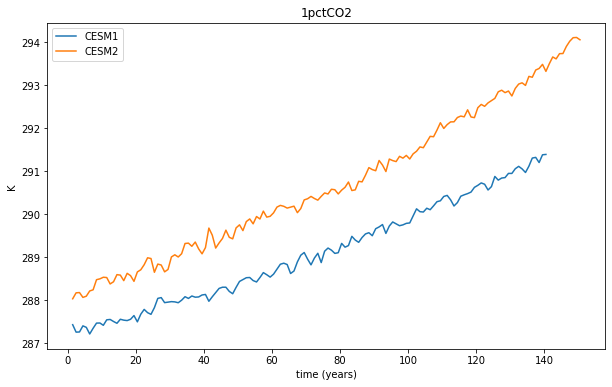

In [11]:
plot_1var('TS', [ds_1pctCO2_cmip5_ann, ds_1pctCO2_ann],
          ['CESM1', 'CESM2'], '1pctCO2', region_val='Global');

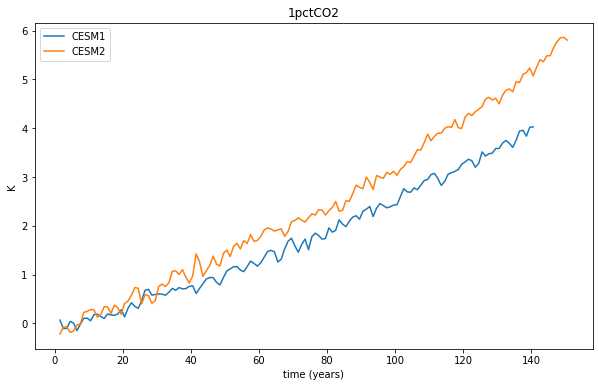

In [12]:
plot_1var('TS_anom', [ds_1pctCO2_cmip5_ann, ds_1pctCO2_ann],
          ['CESM1', 'CESM2'], '1pctCO2', region_val='Global');

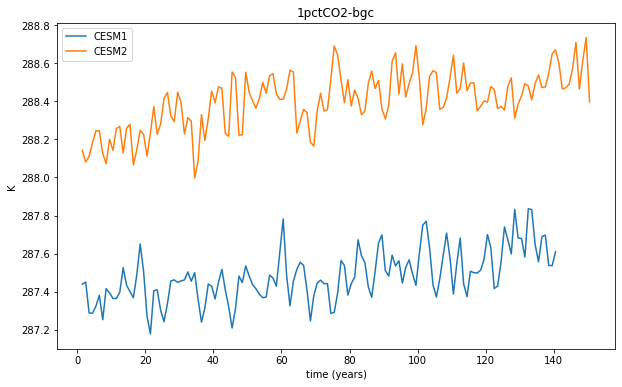

In [13]:
plot_1var('TS', [ds_1pctCO2_bgc_cmip5_ann, ds_1pctCO2_bgc_ann],
          ['CESM1', 'CESM2'], '1pctCO2-bgc', region_val='Global');

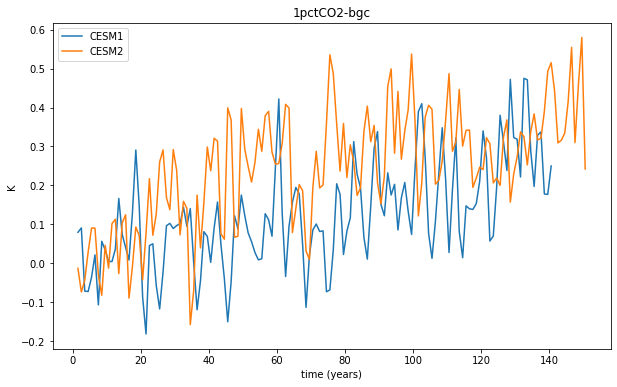

In [14]:
plot_1var('TS_anom', [ds_1pctCO2_bgc_cmip5_ann, ds_1pctCO2_bgc_ann],
          ['CESM1', 'CESM2'], '1pctCO2-bgc', region_val='Global');

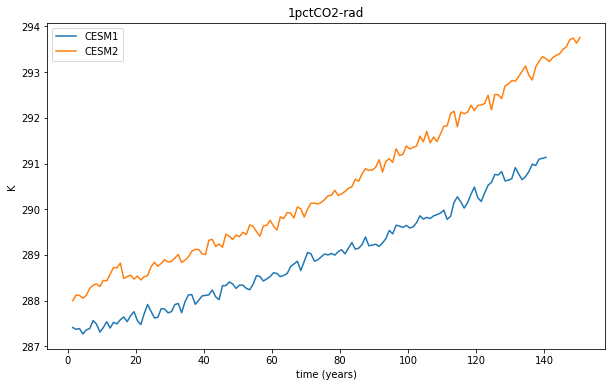

In [15]:
plot_1var('TS', [ds_1pctCO2_rad_cmip5_ann, ds_1pctCO2_rad_ann],
          ['CESM1', 'CESM2'], '1pctCO2-rad', region_val='Global');

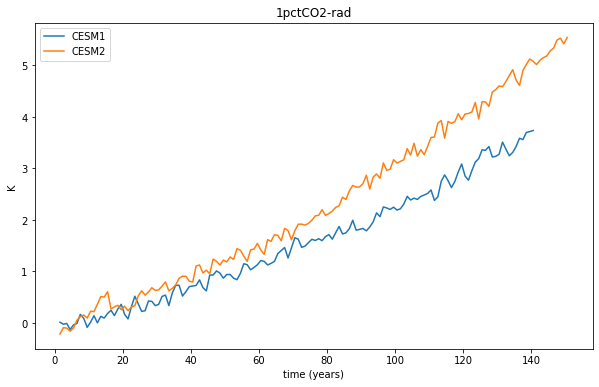

In [16]:
plot_1var('TS_anom', [ds_1pctCO2_rad_cmip5_ann, ds_1pctCO2_rad_ann],
          ['CESM1', 'CESM2'], '1pctCO2-rad', region_val='Global');

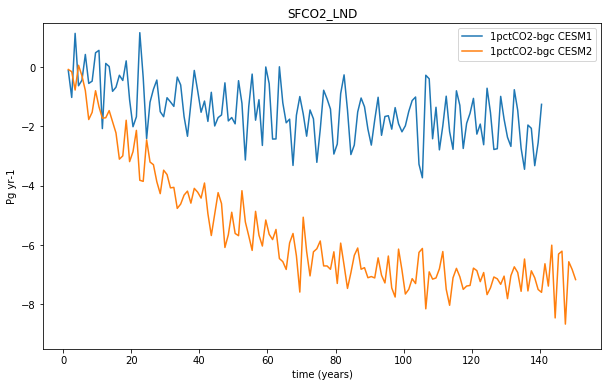

In [17]:
varname = 'SFCO2_LND'
plot_1var(varname, [ds_1pctCO2_bgc_cmip5_ann, ds_1pctCO2_bgc_ann],
          ['1pctCO2-bgc CESM1', '1pctCO2-bgc CESM2'], varname, region_val='Global')
plt.ylim(-9.5, 1.5);

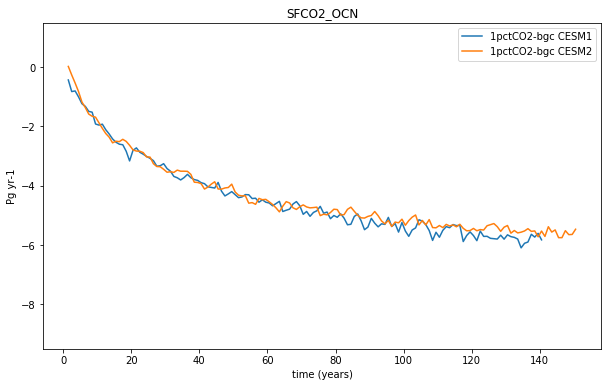

In [18]:
varname = 'SFCO2_OCN'
plot_1var(varname, [ds_1pctCO2_bgc_cmip5_ann, ds_1pctCO2_bgc_ann],
          ['1pctCO2-bgc CESM1', '1pctCO2-bgc CESM2'], varname, region_val='Global')
plt.ylim(-9.5, 1.5);

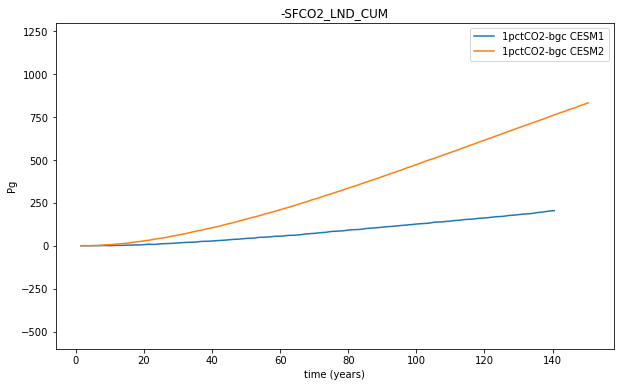

In [19]:
varname = 'SFCO2_LND_CUM'
plot_1var(varname, [ds_1pctCO2_bgc_cmip5_ann, ds_1pctCO2_bgc_ann],
          ['1pctCO2-bgc CESM1', '1pctCO2-bgc CESM2'], '-'+varname, region_val='Global')
plt.ylim(-600, 1300);

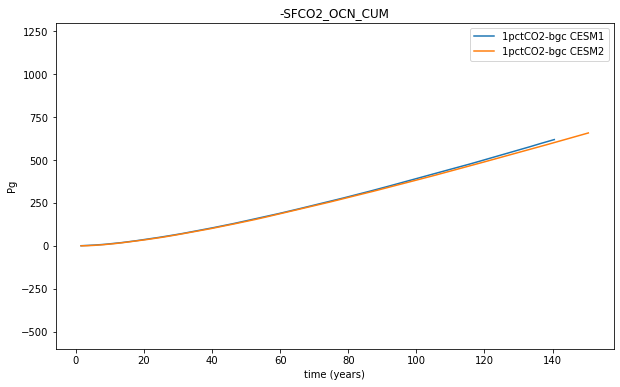

In [20]:
varname = 'SFCO2_OCN_CUM'
plot_1var(varname, [ds_1pctCO2_bgc_cmip5_ann, ds_1pctCO2_bgc_ann],
          ['1pctCO2-bgc CESM1', '1pctCO2-bgc CESM2'], '-'+varname, region_val='Global')
plt.ylim(-600, 1300);

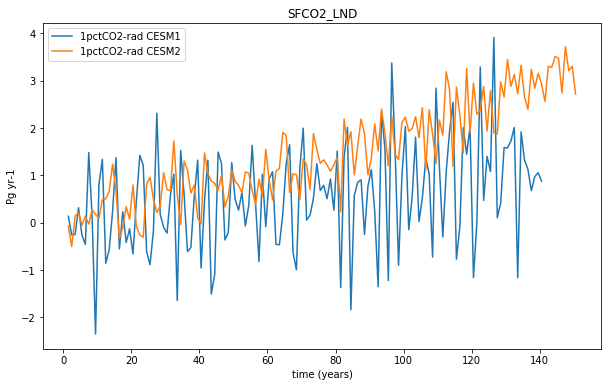

In [21]:
varname = 'SFCO2_LND'
plot_1var(varname, [ds_1pctCO2_rad_cmip5_ann, ds_1pctCO2_rad_ann],
          ['1pctCO2-rad CESM1', '1pctCO2-rad CESM2'], varname, region_val='Global');

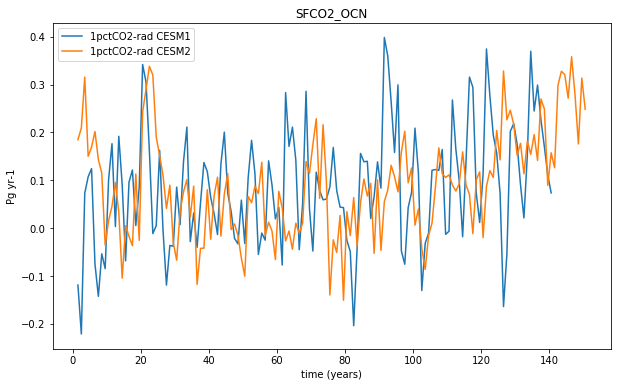

In [22]:
varname = 'SFCO2_OCN'
plot_1var(varname, [ds_1pctCO2_rad_cmip5_ann, ds_1pctCO2_rad_ann],
          ['1pctCO2-rad CESM1', '1pctCO2-rad CESM2'], varname, region_val='Global');